In [35]:
# Basic Python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re

In [36]:
# Load the TSV files
train_file_path = r'C:\Users\prits\Downloads\Data\ghc_train.tsv'
df = pd.read_csv(train_file_path, sep='\t')

# DATA CLEANING

In [3]:
#To know are the columns in our dataset
# Columns: Assault on Human Dignity (hd), Calls for Violence (cv), Vulgarity/Offensive Language directed at an individual (vo)
df.columns

Index(['text', 'hd', 'cv', 'vo'], dtype='object')

In [4]:
#Top 10 rows in our dataset
df.head(10)

,text,hd,cv,vo
0,He most likely converted to islam due to his n...,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0
5,taking a look at new opportunity called FX Pro...,0,0,0
6,Reflecting back when I was in school with Spec...,0,0,0
7,"Let's be honest everyone, last year there were...",0,0,0
8,2007 Nuke plant in Syria,0,0,0
9,NBC's Chuck Todd Thinks He's Figured It All Ou...,0,0,0


In [5]:
#Describe function to find total count,etc
df.describe()

,hd,cv,vo
count,22036.000000,22036.000000,22036.000000
mean,0.084271,0.005945,0.062579
std,0.277800,0.076875,0.242210
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [37]:
df.count()

text    22036
hd      22036
cv      22036
vo      22036
dtype: int64

In [38]:
#CHECKING IF THERE IS ANY NULL VALUES
print(df.isnull().sum())

text    0
hd      0
cv      0
vo      0
dtype: int64


In [9]:
#CHECKING IF THERE IS ANY DUPLICATE VALUES
df.duplicated().sum()


72

In [10]:
# removing the duplicates and keeing just the first occurrence
df = df.drop_duplicates()

In [11]:
#again checking for duplicates 
df.duplicated().sum()

0

# PIE CHART FOR VISUALISATION

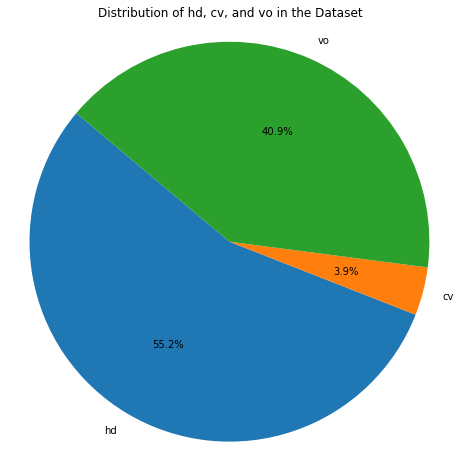

In [12]:
import matplotlib.pyplot as plt

# Sum the values of each column
hd_sum = df['hd'].sum()
cv_sum = df['cv'].sum()
vo_sum = df['vo'].sum()

# Create a list of sums and corresponding labels
sums = [hd_sum, cv_sum, vo_sum]
labels = ['hd', 'cv', 'vo']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of hd, cv, and vo in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Punctuation Removal

In [13]:
# Remove punctuations and symbols
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', "", string.punctuation))
    return text
# Apply the function to all string cells in the DataFrame
df = df.applymap(remove_punctuation)
print(df.head)

<bound method NDFrame.head of                                                     text  hd  cv  vo
0      He most likely converted to islam due to his n...   0   0   0
1      So Ford lied about being a psychologist Record...   0   0   0
2             Jobs Education Ending abuse of Nation CA43   0   0   0
3      I share a lot of your values  like many who do...   0   0   0
4      I am so ready to get back to blogging wwwbenbr...   0   0   0
...                                                  ...  ..  ..  ..
22031  Im a fan of western civilization and one bedro...   0   0   0
22032  Or  is she saying that Muslims dont know how t...   0   0   0
22033  Thank you to all my followers that follow me e...   0   0   0
22034  Wednesday music httpswwwyoutubecomwatchvfI2Z1l...   0   0   0
22035  This is a really Big Surprise  httpswwwwndcom2...   0   0   0

[21964 rows x 4 columns]>


In [14]:
#removing double quotes
import re

def remove_quotes(text):
    if isinstance(text, str):
        return re.sub(r'[“”]', '', text)
    else:
        return text

df = df.applymap(remove_quotes)


# STOPWORDS REMOVAL 

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#stopwords are commonly used words in a language that are often ignored  or filtered out in natural language processing
#tasks beacuase they carry less meaningful information compared to other words
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

# Define a function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([word for word in words if word.lower() not in stop_words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(remove_stopwords)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'so', "mightn't", "wasn't", "that'll", 'whom', 'were', 'the', 'are', 'during', 'down', "it's", 'such', "she's", 'those', "you're", 'how', "don't", 'aren', 'my', "won't", 'against', 'itself', 'him', 'now', 'because', 'couldn', 'nor', 'until', 'myself', "you'd", 'herself', 'being', 'wouldn', 'an', 'had', 'up', 'more', 'own', 'but', 'having', 'themselves', 'and', 'hers', 'shan', 'once', 'not', 'just', 'if', 'm', "isn't", 'when', 'me', 'ourselves', 'our', 'theirs', 'have', 'won', 'do', 'this', 'through', 'd', 'same', 'after', 'needn', 'their', "aren't", 'again', 'in', 'didn', 'further', 'hasn', 'his', 'wasn', 'hadn', 'no', 'who', 'here', 'most', 'll', 'weren', 'yourself', 'doing', 'was', 'by', 'then', 'did', 'he', 'there', 'doesn', 'you', "haven't", 'only', 'she', 'why', 'been', 'these', "shan't", 'some', 're', 'out', 'its', 'few', "couldn't", 'yours', 'don', 'all', "mustn't", "didn't", 'between', 'each', "needn't", 'should', 'as', 'at', 'very', 'than', 'from', 'ours', 'your', 'for', 'isn

# STEMMING

In [19]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Stemming is an NLP technique used to reducce words to their base or root form. 
#for eg, the words "running", "runner", and "ran" can all be reduced to the stem "run"

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Define a function to perform stemming
def stem_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(stem_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976  
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
df= pd.concat(train_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned DataFrame:")
print(df.head())



Cleaned DataFrame:
                                                text  hd  cv  vo
0  he most like convert to islam due to hi natur ...   0   0   0
1  so ford lie about be a psychologist . record s...   0   0   0
2           job . educ . end abus of nation . ca43 .   0   0   0
3  i share a lot of your valu , & like mani who d...   0   0   0
4  i am so readi to get back to blog ! www.benbri...   0   0   0


# LEMMITIZATION

In [28]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
#Lemmitization ia a NLP technique that invloves reducing words to thier base or dictionary form, known as the lemma. 
#eg: words: "running", "ran", "runs" ..... lemma:"run"

import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(lemmatize_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)


# Display a few rows of the cleaned train DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  He most likely converted to islam due to his n...   0   0   0
1  So Ford lied about being a psychologist . Reco...   0   0   0
2  Jobs . Education . Ending abuse of Nation . CA...   0   0   0
3  I share a lot of your value , & like many who ...   0   0   0
4  I am so ready to get back to blogging ! www.be...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  http : //www.youtube.com/watch ? v=kACWpKAKtak...   0   0   0
1  Very nice ! I tend to get tired of the constan...   0   0   0
2      Watch today . http : //circumcisionmovie.com/   0   0   0
3  `` Thinking Venues `` First Color Layer blocki...   0   0   0
4  What about death penalty for perpetrator and e...   0   0   0


ADDING A NEW COLUMN CALLED LABEL

In [32]:
#As hd cv and vo are the types of hatespeech so the additional column called label will tell whether the text we have is hate speech or not
# Adding 'label' column
train_df['label'] = ((train_df['hd'] == 1) | (train_df['cv'] == 1) | (train_df['vo'] == 1)).astype(int)
test_df['label'] = ((test_df['hd'] == 1) | (test_df['cv'] == 1) | (test_df['vo'] == 1)).astype(int)


# URL removal, hastags and mentions

In [33]:
# removing urls,hastags and mentions
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text
df['text'] = df['text'].apply(remove_urls_mentions_hashtags)

In [34]:
def remove_url(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

train_df['text'] = train_df['text'].apply(remove_url)


# Emoji removal

In [40]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [41]:
#emoji removal
import pandas as pd
import emoji

# Define a function to replace emoji codes with descriptive text
def replace_emojis(text):
    return emoji.demojize(text)

# Replace emoji codes in a specific column (e.g., 'text_column')
df['text'] = df['text'].apply(replace_emojis)


# Lowercasing

In [48]:
df['text']=df['text'].str.lower()

In [49]:
df.tail()

,text,hd,cv,vo,label
22031,"i'm a fan of western civilization, and one bed...",0,0,0,0
22032,or ... is she saying that muslims don't know h...,0,0,0,0
22033,thank you to all my followers that follow me e...,0,0,0,0
22034,wednesday music.,0,0,0,0
22035,this is a really big surprise!,0,0,0,0


In [51]:
# Drop rows with any missing values and filter out rows where the 'text' column is '[deleted]' or '[removed]'
df = df.dropna().loc[(df['text'] != '[deleted]') & (df['text'] != '[removed]')]

In [55]:
df.count()


text     21776
hd       21776
cv       21776
vo       21776
label    21776
dtype: int64

# TOKENISATION

In [28]:
#whitespacetokenisation
from nltk.tokenize import WhitespaceTokenizer

# Initialize the whitespace tokenizer
whitespace_tokenizer = WhitespaceTokenizer()
def  whitespace_tokenize(text):
    return whitespace_tokenizer.tokenize(text)
df['tokens'] = df['text'].apply(whitespace_tokenize)
df.head()

,text,hd,cv,vo,label,tokens
0,he most likely converted to islam due to his n...,0,0,0,0,"[he, most, likely, converted, to, islam, due, ..."
1,so ford lied about being a psychologist record...,0,0,0,0,"[so, ford, lied, about, being, a, psychologist..."
2,jobs education ending abuse of nation californ...,0,0,0,0,"[jobs, education, ending, abuse, of, nation, c..."
3,i share a lot of your values like many who do...,0,0,0,0,"[i, share, a, lot, of, your, values, like, man..."
4,i am so ready to get back to blogging recipes...,0,0,0,0,"[i, am, so, ready, to, get, back, to, blogging..."


In [58]:
# saving the cleaned data
clean_train_file_path = r'C:\Users\prits\Downloads\Data\clean_ghc_train.csv'
train_df.to_csv(clean_train_file_path, sep=',', index=False)

In [20]:
#importing clean dataset i.e after preprosseing
import pandas as pd
# File paths
train_file = r"C:\Users\prits\Downloads\Data\clean_ghc_train.csv"

# Load CSV files into pandas DataFrames
df = pd.read_csv(train_file)


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
# Drop rows with NaN in 'text' column
df =df.dropna(subset=['text'])
# Split the data into X (features) and y (labels)
X = df['text']
y = df['label']

In [23]:
# Print the number of rows
print("Number of rows in X:", X.shape[0])
print("Number of rows in y_test:", y.shape[0])

Number of rows in X: 21772
Number of rows in y_test: 21772


Spliting data into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [25]:
# Print the number of rows
print("Number of rows in x_train:", X_train.shape[0])
print("Number of rows in x_test:", X_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])

Number of rows in x_train: 17417
Number of rows in x_test: 4355
Number of rows in y_train: 17417
Number of rows in y_test: 4355


# FINALISED EMBEDDING TECHNIQUE: TFIDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus).
 TF-IDF is used to convert text data into numerical features before feeding them into a machine learning model. 

In [26]:
#Initialize TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

#Fit and transform X_train (text data) using TfidfVectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using the fitted TfidfVectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# BALANCING TRAIN DATASET USING RANDOM OVER SAMPLING

Reason of choosing Random Over sampling:
    By duplicating minority class instances, random oversampling ensures that the original characteristics of the minority class are preserved without introducing new data points that may alter the distribution.
    I tried all other approaches for balancing but random over sampling gives better result than other techniques

In [27]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled= ros.fit_resample(X_train_tfidf, y_train)

# FINALISED ML MODEL: GRADIENT BOOSTING CLASSIFIER

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_resampled,y_resampled)

# Make predictions
y_pred = gb_clf.predict(X_test_tfidf)

Visualising the Result

Accuracy: 0.8305396096440872
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3800
           1       0.39      0.56      0.46       555

    accuracy                           0.83      4355
   macro avg       0.66      0.71      0.68      4355
weighted avg       0.86      0.83      0.84      4355



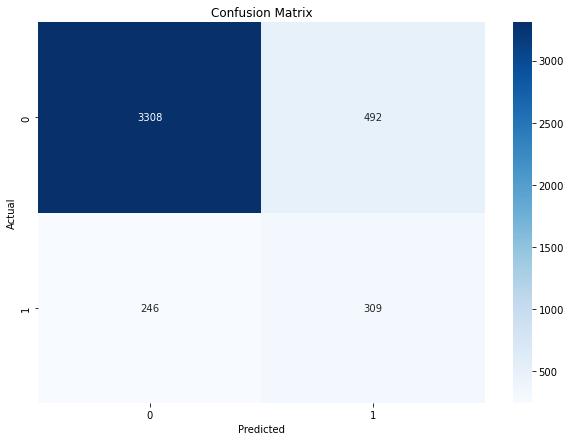

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hypertunning of Model

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Best Recall Score:  0.9148278267676782
Accuracy: 0.8470723306544202
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3800
           1       0.42      0.50      0.46       555

    accuracy                           0.85      4355
   macro avg       0.67      0.70      0.68      4355
weighted avg       0.86      0.85      0.85      4355



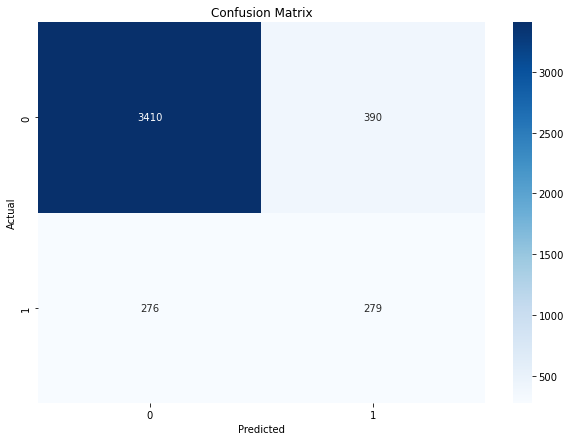

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
gb = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5]
}

# Set up GridSearchCV for recall
grid_search_recall = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search_recall.fit(X_resampled, y_resampled)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search_recall.best_params_)
print("Best Recall Score: ", grid_search_recall.best_score_)

# Predict using the best estimator
best_gb_recall = grid_search_recall.best_estimator_
y_pred_recall = best_gb_recall.predict(X_test_tfidf)

# Calculate accuracy
accuracy_recall = accuracy_score(y_test, y_pred_recall)
print(f"Accuracy: {accuracy_recall}")

# Generate classification report
classification_report_recall = classification_report(y_test, y_pred_recall)
print("Classification Report:")
print(classification_report_recall)

# Generate confusion matrix
conf_matrix_recall = confusion_matrix(y_test, y_pred_recall)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_recall, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


GRADIENT BOOSTING CLASSIFIER is the final ml model i have fixed based on the accuracy and recall score.This model able to predict 0 and 1 class better than other class.